In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [19]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


In [6]:
data = pd.read_csv(r'C:\Users\Mir Sahib\Desktop\Project-Andromeda-Major\Dataset\MIJA\MIJA_Dataset.csv')



In [7]:
data.head()


,Joint_7_az,Joint_7_el,Joint_8_az,Joint_8_el,Joint_9_az,Joint_9_el,Joint_10_az,Joint_10_el,Joint_11_az,Joint_11_el,...,Joint_13_el,Joint_14_az,Joint_14_el,Joint_17_az,Joint_17_el,Joint_18_az,Joint_18_el,Joint_19_az,Joint_19_el,label
0,68.714796,-51.028249,-70.756902,48.165478,-61.059423,45.145196,-100.194517,48.698579,-96.225134,49.357339,...,43.268495,-54.282020,43.089623,-60.659044,44.755081,-56.504841,43.254255,-47.154470,39.834708,1
1,102.907502,-61.487217,-78.285798,49.200884,-61.059423,45.145196,-92.120336,49.715327,-96.225134,49.357339,...,43.855749,-59.870186,44.269389,-60.659044,44.755081,-55.684413,44.467419,-43.699667,38.734475,1
2,102.907502,-11.187078,-78.285798,49.746081,-61.059423,45.716617,-100.194517,49.856699,-96.225134,49.926596,...,44.431660,-60.646838,42.947026,-60.659044,45.373885,-50.680365,43.763751,-40.631626,38.180966,1
3,100.751462,-56.956309,-78.285798,49.746081,-61.059423,45.716617,-100.194517,49.284438,-96.225134,49.357339,...,43.855749,-60.646838,41.619291,-60.659044,45.373885,-56.504841,42.639006,-43.699667,37.595209,1
4,68.714796,-56.273126,-77.922111,50.052890,-67.668815,46.732198,-100.194517,49.284438,-96.225134,49.357339,...,43.855749,-55.132298,40.571649,-60.659044,45.373885,-56.504841,43.254255,-43.699667,38.169293,1


In [8]:
X = data.drop('label',axis=1)
y = data['label']
X.shape,y.shape

((22797, 22), (22797,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape


((18237, 22), (4560, 22))

## Step forward feature selection

In [10]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = 7,
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:  1.8min finished

[2020-03-16 22:24:56] Features: 1/7 -- score: 0.46850544775303543[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  1.4min finished

[2020-03-16 22:26:22] Features: 2/7 -- score: 0.25716738170715986[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.3min finished

[2020-03-16 22:27:42] Features: 3/7 -- score: 0.3512055014672717[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:  1.8min finished

[2020-03-16 22:29:28] Features: 4/7 -- score: 0.4370205547911466[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.7min finished

[2

In [11]:
sfs.k_feature_names_


('Joint_7_az',
 'Joint_7_el',
 'Joint_8_az',
 'Joint_8_el',
 'Joint_12_el',
 'Joint_17_az',
 'Joint_17_el')

In [12]:
sfs.k_feature_idx_


(0, 1, 2, 3, 11, 16, 17)

In [13]:
sfs.k_score_

0.5483878730147962

In [16]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.11672473867595819, 0.10701754385964912, 0.1...",0.111964,"(RangeY,)",0.0147326,0.00919074,0.00530628
2,"(1, 4)","[0.25609756097560976, 0.22456140350877193, 0.2...",0.236698,"(RangeY, MeanY)",0.0209029,0.01304,0.00752866
3,"(1, 4, 5)","[0.37282229965156793, 0.3456140350877193, 0.33...",0.345972,"(RangeY, MeanY, MeanZ)",0.0266611,0.0166322,0.00960261
4,"(1, 3, 4, 5)","[0.42857142857142855, 0.4263157894736842, 0.41...",0.414314,"(RangeY, MeanX, MeanY, MeanZ)",0.0287602,0.0179417,0.0103586
5,"(1, 3, 4, 5, 6)","[0.4616724738675958, 0.47719298245614034, 0.46...",0.462465,"(RangeY, MeanX, MeanY, MeanZ, VarX)",0.0155226,0.00968355,0.0055908
6,"(1, 3, 4, 5, 6, 8)","[0.48257839721254353, 0.5280701754385965, 0.50...",0.499534,"(RangeY, MeanX, MeanY, MeanZ, VarX, VarZ)",0.0288737,0.0180125,0.0103995
7,"(1, 2, 3, 4, 5, 6, 8)","[0.5, 0.531578947368421, 0.5070921985815603, 0...",0.506989,"(RangeY, RangeZ, MeanX, MeanY, MeanZ, VarX, VarZ)",0.0249227,0.0155477,0.00897649


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x20edf96d9c8>)

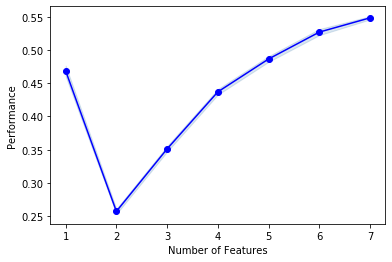

In [21]:
plot_sfs(sfs.get_metric_dict(), kind='std_dev')

## Step Backward feature selection

In [15]:
sbs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = (1, 8),
          forward= False,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:  3.4min finished

[2020-03-16 22:40:00] Features: 21/1 -- score: 0.6238399706456192[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  3.2min finished

[2020-03-16 22:43:14] Features: 20/1 -- score: 0.6241118940755646[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.1min finished

[2020-03-16 22:46:19] Features: 19/1 -- score: 0.6247704884717699[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:  2.9min finished

[2020-03-16 22:49:14] Features: 18/1 -- score: 0.6233462384738526[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  2.7min finished



In [16]:
sbs.k_score_


0.5678512070818751

In [17]:
sbs.k_feature_names_


('Joint_7_az',
 'Joint_7_el',
 'Joint_8_az',
 'Joint_8_el',
 'Joint_10_az',
 'Joint_13_el',
 'Joint_17_el',
 'Joint_19_az')

In [22]:
pd.DataFrame.from_dict(sbs.get_metric_dict()).T


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
22,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.6178274200613229, 0.6341516878562035, 0.624...",0.623401,"(Joint_7_az, Joint_7_el, Joint_8_az, Joint_8_e...",0.0111184,0.0069361,0.00400456
21,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.6176084099868594, 0.6319596668128014, 0.628...",0.62384,"(Joint_7_az, Joint_7_el, Joint_8_az, Joint_8_e...",0.0106299,0.0066313,0.00382859
20,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.6233026719229084, 0.6284524331433582, 0.629...",0.624112,"(Joint_7_az, Joint_7_el, Joint_8_az, Joint_8_e...",0.00879157,0.00548451,0.00316648
19,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.6237406920718354, 0.6295484436650591, 0.628...",0.62477,"(Joint_7_az, Joint_7_el, Joint_8_az, Joint_8_e...",0.00741622,0.00462652,0.00267112
18,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.6195795006570303, 0.6299868478737396, 0.625...",0.623346,"(Joint_7_az, Joint_7_el, Joint_8_az, Joint_8_e...",0.00780319,0.00486792,0.0028105
17,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...","[0.6219886114761279, 0.6288908373520385, 0.627...",0.624113,"(Joint_7_az, Joint_7_el, Joint_8_az, Joint_8_e...",0.00692644,0.00432097,0.00249471
16,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...","[0.6184844502847131, 0.6247259973695748, 0.629...",0.62258,"(Joint_7_az, Joint_7_el, Joint_8_az, Joint_8_e...",0.00771345,0.00481194,0.00277817
15,"(0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 1...","[0.6180464301357862, 0.6229723805348532, 0.625...",0.618848,"(Joint_7_az, Joint_7_el, Joint_8_az, Joint_8_e...",0.00971838,0.00606269,0.0035003
14,"(0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 13, 14, 17, 20)","[0.6149802890932983, 0.6185883384480491, 0.623...",0.61781,"(Joint_7_az, Joint_7_el, Joint_8_az, Joint_8_e...",0.00614627,0.00383427,0.00221372
13,"(0, 1, 2, 3, 4, 5, 6, 9, 11, 13, 14, 17, 20)","[0.6103810775295664, 0.6082858395440596, 0.622...",0.612107,"(Joint_7_az, Joint_7_el, Joint_8_az, Joint_8_e...",0.00970814,0.0060563,0.00349661


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x20edf8cb648>)

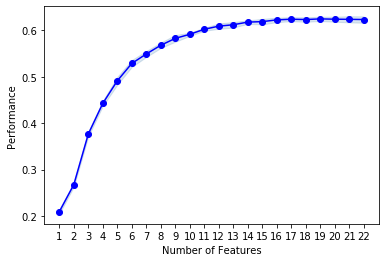

In [20]:
plot_sfs(sbs.get_metric_dict(), kind='std_dev')

## Exhaustive feature selection

In [20]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS


In [21]:
efs = EFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
         min_features= 4,
          max_features= 7,
          scoring='accuracy',
          cv = None,
          n_jobs=-1
         ).fit(X_train, y_train)


/home/mirsahib/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
Features: 3003/3003

In [22]:
help(efs)


Help on ExhaustiveFeatureSelector in module mlxtend.feature_selection.exhaustive_feature_selector object:

class ExhaustiveFeatureSelector(sklearn.base.BaseEstimator, sklearn.base.MetaEstimatorMixin)
 |  ExhaustiveFeatureSelector(estimator, min_features=1, max_features=1, print_progress=True, scoring='accuracy', cv=5, n_jobs=1, pre_dispatch='2*n_jobs', clone_estimator=True)
 |  
 |  Exhaustive Feature Selection for Classification and Regression.
 |     (new in v0.4.3)
 |  
 |  Parameters
 |  ----------
 |  estimator : scikit-learn classifier or regressor
 |  min_features : int (default: 1)
 |      Minumum number of features to select
 |  max_features : int (default: 1)
 |      Maximum number of features to select
 |  print_progress : bool (default: True)
 |      Prints progress as the number of epochs
 |      to stderr.
 |  scoring : str, (default='accuracy')
 |      Scoring metric in {accuracy, f1, precision, recall, roc_auc}
 |      for classifiers,
 |      {'mean_absolute_error', 'm

In [23]:
efs.best_score_


1.0

In [24]:
efs.best_feature_names_


('RangeX', 'RangeY', 'RangeZ', 'MeanX')

In [25]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


/home/mirsahib/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/mirsahib/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f824ccbcf10>)

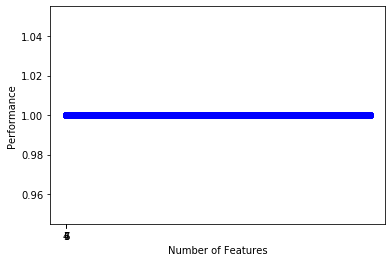

In [26]:
plot_sfs(efs.get_metric_dict(), kind='std_dev')
